<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [15]:
#Load dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [16]:
type(data)

sklearn.utils.Bunch

In [17]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
data.data.shape

(569, 30)

In [19]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [20]:
print(data.target_names)
print(data.target.shape)

['malignant' 'benign']
(569,)


In [21]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3)
N,D=X_train.shape
print(N,D)

398 30


In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)       #
X_test=scaler.transform(X_test)

In [24]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),        #D=numero di features
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#si può anche fare:
#model=tf.keras.models.Sequential()
#model.add( tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

print("Train score:", model.evaluate(X_train,y_train))
print("Test score:", model.evaluate(X_test,y_test))

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.9744 - accuracy: 0.2789 - val_loss: 0.9621 - val_accuracy: 0.3216
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8713 - accuracy: 0.3618 - val_loss: 0.8545 - val_accuracy: 0.4444
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7804 - accuracy: 0.4673 - val_loss: 0.7624 - val_accuracy: 0.4971
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7022 - accuracy: 0.5678 - val_loss: 0.6845 - val_accuracy: 0.6082
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6363 - accuracy: 0.6508 - val_loss: 0.6184 - val_accuracy: 0.6959
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7161 - val_loss: 0.5635 - val_accuracy: 0.7368
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5328 - accuracy: 0.7663 - val_loss: 0.5183 - val_accuracy: 0.7778
Epoch 8/100


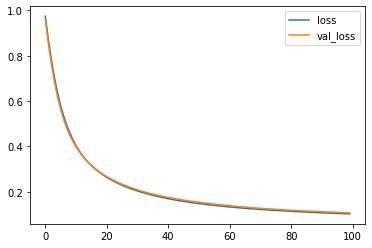

In [25]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

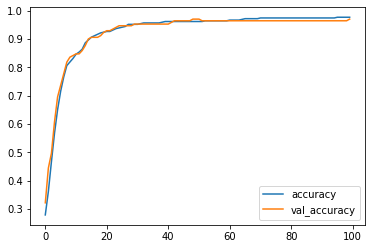

In [26]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [27]:
P=model.predict(X_test)
print(P)

[[9.86817837e-01]
 [9.94765997e-01]
 [4.69170511e-02]
 [2.17407048e-02]
 [9.80932474e-01]
 [3.64381492e-01]
 [1.40824914e-03]
 [8.89978886e-01]
 [9.98402834e-01]
 [3.98768187e-02]
 [1.36451754e-05]
 [7.50344098e-02]
 [2.02000141e-04]
 [9.47602391e-01]
 [1.69062614e-03]
 [9.99728501e-01]
 [4.25660610e-01]
 [5.32578997e-05]
 [9.86696243e-01]
 [1.62221136e-06]
 [9.79680181e-01]
 [3.49146128e-03]
 [4.98684049e-01]
 [6.56643391e-01]
 [3.64234149e-02]
 [9.34376538e-01]
 [2.49590009e-01]
 [9.96809125e-01]
 [1.25106841e-01]
 [5.51204503e-01]
 [9.86546516e-01]
 [9.19726729e-01]
 [9.79574144e-01]
 [2.55568326e-02]
 [9.60314095e-01]
 [7.37962723e-01]
 [9.76758361e-01]
 [9.97957468e-01]
 [3.91912162e-02]
 [7.28633761e-01]
 [2.64058739e-01]
 [9.87669468e-01]
 [9.96160269e-01]
 [9.80364621e-01]
 [9.96695280e-01]
 [2.35098600e-03]
 [5.82632840e-01]
 [1.13863051e-02]
 [9.97893214e-01]
 [4.20599662e-07]
 [7.69585371e-04]
 [9.80809450e-01]
 [1.73205137e-02]
 [9.90973353e-01]
 [8.28678822e-05]
 [9.997636

In [29]:
import numpy as np
P=np.round(P).flatten() #flatten-> una dimensione
print(P)

[1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1.]


In [32]:
print("Manually calculated accuracy:", np.mean(P==y_test))
print("Evaluate Output:",model.evaluate(X_test,y_test))

Manually calculated accuracy: 0.9707602339181286
6/6 [==============================] - 0s 2ms/step - loss: 0.1069 - accuracy: 0.9708
Evaluate Output: [0.10687967389822006, 0.9707602262496948]


In [35]:
model.save("linearclassifier.h5")
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K May 20 10:17 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K May 17 13:39 sample_data


In [36]:
model=tf.keras.models.load_model("linearclassifier.h5")
print(model.layers)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9708


[0.10687967389822006, 0.9707602262496948]

In [37]:
from google.colab import files
files.download("linearclassifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>